# 퍼셉트론 을 이해한다. 

퍼셉트론은 하나의 알고리즘이다. 

퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호로 출력한다. 
여기서 말하는 신호란 전류처럼 흐름이 있는것을 상상하면 좋다. 
흐른다(1), 흐르지 않는다 (0) 

노드 : 입력신호 
가중치 : 입력신호가 노드에 보내질때 각각 고유한 가중치를 곱해져서 전해진다. 
임계값 : 정해진 한계를 넘을때만 1을 출력한다. 그 기준의 한계를 임계값이라고 한다. 


 참고하면 좋은 글 https://clickai.ai/resource/blog/blog_post_3.html

# AND 게이트 NAND 게이트와 OR 게이트 


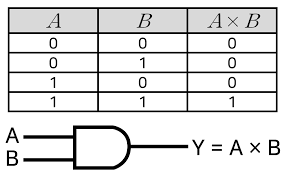

AND 게이트 진리표

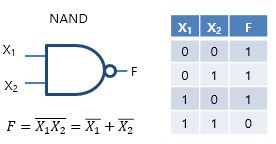

NAND 게이트 진리표 

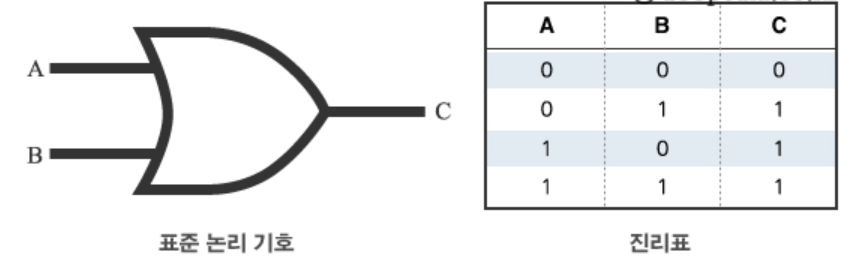

OR 게이트 진리표 

# 퍼셉트론 구현하기 

논리 회로를 파이썬으로 구현할 수 있다. 

## AND 게이트 구현 하기 

In [9]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1 

In [10]:
AND(0, 0) # 0
AND(1, 0) # 0
AND(0, 1) # 0
AND(1, 1) # 1

1

# 가중치와 편향 도입 
앞에서 구현한 AND 게이트는 직관적이고 알기 쉽지만, 앞으로를 생해서 다른 방식으로 수정하고자 한다. 

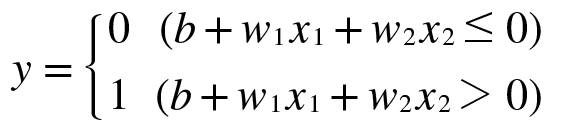

퍼셉트론은 입력신호에 가중치를 곱한 편향을 합하여, 그값이 0이 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다. 

넘파이를 활용하여 위 방식을 구현해 보자! 


In [11]:
import numpy as np

x = np.array([0, 1])        # 입력 
w = np.array([0.5, 0.5])    # 가중치
b = -0.7                    # 편향
w*x

array([0. , 0.5])

In [12]:
np.sum(w*x)

0.5

In [13]:
np.sum(w*x)+b

-0.19999999999999996

 대략 -0.2 (부동소수점 수에 의한 연산 오차)

# 가중치와 편향 구현하기 

In [15]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5 , 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1 
        

 여기서 편향이 b 로 치환되었다. 그리고 편향은 가중치 w1, w1 와 다르다는 사실에 주의 한다. 
 
 구체적으로 w1 과 w2는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수고, 편향은 뉴런이 얼마나 쉽게 활성화 하느냐를 조정하는 매개 변수 이다. 

# NAND 게이트 와 OR 게이트 구현 

In [16]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) +b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) +b
    if tmp <= 0:
        return 0
    else:
        return 1


 앞 절에서 AND , NANA, OR 모두 같은 구조의 퍼셉트론이고, 차이는 가중치 매개 변수의 값 뿐이다. 


# 퍼셉트론의 한계 

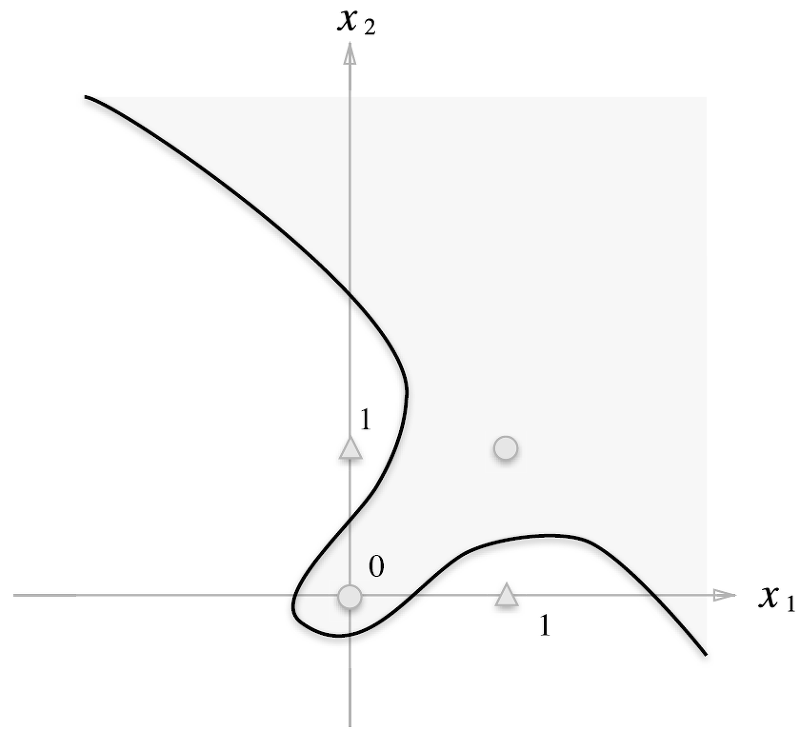

XOR 게이트 는 배타적 논리합이라는 논리 회로이다. 
한쪽이 1일 때만 출력을 해야하는 게이트 이다. 

퍼셉트론으로 구성 할때는 "다층 퍼셉트론" 을 만들면 가능하다. 

앞에서 만든 AND, NAND, OR 게이트를 조합 하면 된다. 

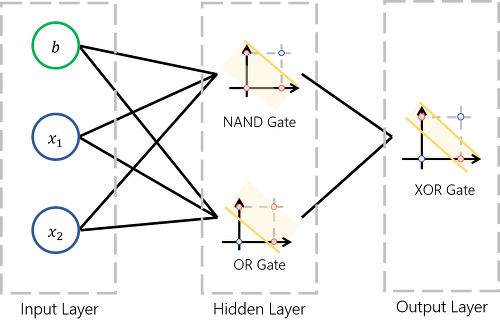

이런식으로 2번 진행하게 된다. 

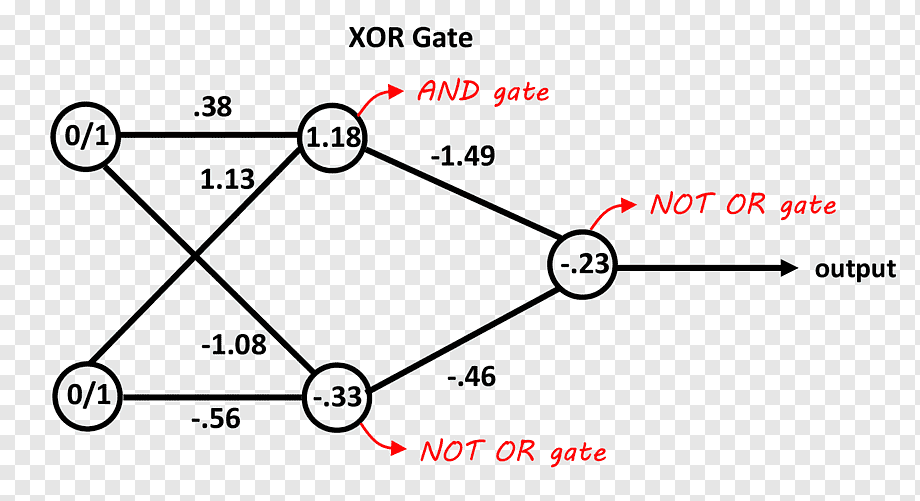

 # XOR 게이트 구현하기 

In [19]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [20]:
XOR(0, 0)  # 0
XOR(1, 0)  # 1
XOR(0, 1)  # 1
XOR(1, 1)  # 0


0

단층에서 구현 할 수 없는 것을 
여러층을 통해 구현할 수 있다는 것을 볼 수 있다. 